<h1><center>Profil Dicoding</center></h1><hr>
<p> Nama  : Sarah Salsabila </p>
<p> Email : m314v4331@dicoding.org</p>
<p> Alamat: Karawang , Jawabarat</p>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import re
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/True.csv')

In [3]:
df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
df['title'] = df['title'].map(lambda x: re.sub(r'\W+', ' ', x))

In [5]:
df.shape

(21417, 4)

In [6]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [7]:
df['subject'].value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

In [8]:
jenis = pd.get_dummies(df.subject)
df_baru = pd.concat([df, jenis], axis=1)
df_baru = df_baru.drop(columns='subject')
df_baru.head()
#Author : Sarah Salsabila (https://github.com/sarahsalsabila01)

,title,text,date,politicsNews,worldnews
0,As U S budget fight looms Republicans flip the...,WASHINGTON (Reuters) - The head of a conservat...,"December 31, 2017",1,0
1,U S military to accept transgender recruits on...,WASHINGTON (Reuters) - Transgender people will...,"December 29, 2017",1,0
2,Senior U S Republican senator Let Mr Mueller d...,WASHINGTON (Reuters) - The special counsel inv...,"December 31, 2017",1,0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,"December 30, 2017",1,0
4,Trump wants Postal Service to charge much more...,SEATTLE/WASHINGTON (Reuters) - President Donal...,"December 29, 2017",1,0


In [9]:
df_baru = df_baru.drop(columns=['text', 'date'])
df_baru.head()

,title,politicsNews,worldnews
0,As U S budget fight looms Republicans flip the...,1,0
1,U S military to accept transgender recruits on...,1,0
2,Senior U S Republican senator Let Mr Mueller d...,1,0
3,FBI Russia probe helped by Australian diplomat...,1,0
4,Trump wants Postal Service to charge much more...,1,0


In [10]:
tittle = df_baru['title'].values
label = df_baru[['politicsNews', 'worldnews']].values

In [11]:
from sklearn.model_selection import train_test_split
tittle_latih, tittle_test, label_latih, label_test = train_test_split(tittle, label, test_size=0.2)

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(tittle_latih) 
tokenizer.fit_on_texts(tittle_test)
 
sekuens_latih = tokenizer.texts_to_sequences(tittle_latih)
sekuens_test = tokenizer.texts_to_sequences(tittle_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [13]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [14]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [15]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9 and logs.get('val_accuracy')>0.9):
      print("Akurasi train dan validasi yang didapat telah mencapai nilai > 90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [16]:
#Author : Sarah Salsabila (https://github.com/sarahsalsabila01)
num_epochs = 10
history = model.fit(padded_latih, label_latih, 
                    epochs=num_epochs, 
                    validation_data=(padded_test, label_test), 
                    verbose=2)

Epoch 1/10
536/536 - 10s - loss: 0.2861 - accuracy: 0.8747 - val_loss: 0.2019 - val_accuracy: 0.9223
Epoch 2/10
536/536 - 8s - loss: 0.1538 - accuracy: 0.9402 - val_loss: 0.2158 - val_accuracy: 0.9153
Epoch 3/10
536/536 - 8s - loss: 0.1155 - accuracy: 0.9525 - val_loss: 0.2190 - val_accuracy: 0.9150
Epoch 4/10
536/536 - 8s - loss: 0.0913 - accuracy: 0.9577 - val_loss: 0.2841 - val_accuracy: 0.9101
Epoch 5/10
536/536 - 8s - loss: 0.0781 - accuracy: 0.9619 - val_loss: 0.3004 - val_accuracy: 0.9104
Epoch 6/10
536/536 - 8s - loss: 0.0674 - accuracy: 0.9660 - val_loss: 0.3489 - val_accuracy: 0.9092
Epoch 7/10
536/536 - 8s - loss: 0.0618 - accuracy: 0.9685 - val_loss: 0.3829 - val_accuracy: 0.9094
Epoch 8/10
536/536 - 8s - loss: 0.0555 - accuracy: 0.9696 - val_loss: 0.4865 - val_accuracy: 0.9108
Epoch 9/10
536/536 - 7s - loss: 0.0497 - accuracy: 0.9736 - val_loss: 0.6029 - val_accuracy: 0.9034
Epoch 10/10
536/536 - 8s - loss: 0.0477 - accuracy: 0.9744 - val_loss: 0.5580 - val_accuracy: 0.906

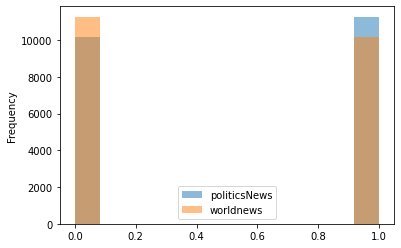

In [17]:
df_baru.plot.hist(bins=12,alpha=0.5)

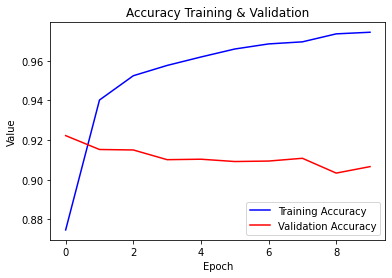

In [18]:
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Accuracy Training & Validation')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

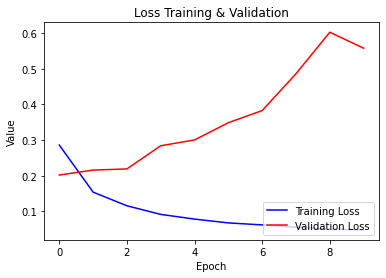

In [19]:
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color = 'red')
plt.title('Loss Training & Validation')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()
#Author : Sarah Salsabila (https://github.com/sarahsalsabila01)